In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

# from random import gauss
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')

# Listing out column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Converting column `date` to datetime64[ns] from type string/object
df['date'] = df['date'].astype('datetime64[ns]')

In [5]:
df_copy = df.copy()

In [6]:
df_copy['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [7]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

In [8]:
#looking at correlations
#fig, ax = plt.subplots(figsize=(15,15))
#heat = sns.heatmap(df_copy.corr(), annot = True)

In [9]:
df_copy.groupby('view').mean()

df_copy.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,YES,AVERAGE,Average,11 Excellent,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13 Mansion,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000.00,5,5.00,8000,23985,2.00,NO,EXCELLENT,Average,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,NO,NONE,Average,5 Fair,900,0.0,1918,0.00,98168,47.47,-122.27,2060,6533
2139,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,NO,NONE,Fair,5 Fair,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
16184,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4 Low,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500


In [10]:
# Dropping irrelevant columns
df_copy.drop(columns = ['id', 'floors', 'waterfront', 'date',
                        'lat', 'long', 'condition', 'yr_renovated',
                         'sqft_lot15','sqft_above', 'sqft_living15',
                         'sqft_basement'],
                        inplace=True)

In [11]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,yr_built,zipcode
2495,300000.00,6,3.00,2400,9373,NONE,7 Average,1991,98002
6729,647500.00,4,1.75,2060,26036,NONE,8 Good,1947,98166
8404,400000.00,3,1.00,1460,43000,NONE,7 Average,1952,98166
8800,235000.00,3,1.00,1430,7599,NONE,6 Low Average,1930,98168
3553,402500.00,4,2.00,1650,3504,NONE,7 Average,1951,98144


In [12]:
df_copy['sqft_living'] = np.log(df_copy['sqft_living'])

In [13]:
# Establishing target and predictor variables
df_copy = df_copy[df_copy['grade'] != '3 Poor']

In [14]:
X = df_copy.drop(columns = 'price')

In [15]:
y = df_copy.price

In [16]:
# Creating variables for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [18]:
# Did it split correctly?
len(X_train + X_test) == len(X)

True

In [19]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [20]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     8365.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:36   Log-Likelihood:            -2.0093e+05
No. Observations:               14350   AIC:                         4.019e+05
Df Residuals:                   14348   BIC:                         4.019e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.426e+06   4.34e+04    -78.854      0.000   -3.51e+06   -3.34e+06
sqft_living  5.254e+05   5744.837     91.458      0.000    5.14e+05    5.37e+05
==============================================================================
Omnibus:                    13227.742   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1260597.499
Skew:                           4.113   Prob(JB):                         0.00
Kurtosis:                      48.174   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Get our predictions!
simple_train_preds = simple_model.predict(sm.add_constant(X_train['sqft_living']))
simple_train_preds

14622   497226.33
1744    717221.00
2729    494215.38
13117   725063.09
18281   372424.45
           ...   
13105   654348.05
17476   336990.11
9990    807720.75
338     387437.19
9180      8237.87
Length: 14350, dtype: float64

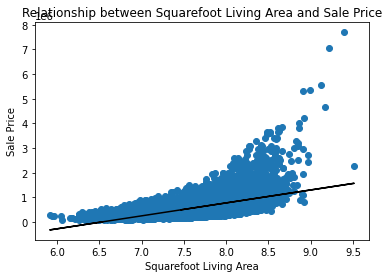

In [22]:
# Just looking at two variables

# Plot our points, rating vs balance, as a scatterplot
plt.scatter(train_df['sqft_living'], train_df['price'])

# Plot the line of best fit!
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')

plt.ylabel('Sale Price')
plt.xlabel('Squarefoot Living Area')
plt.title('Relationship between Squarefoot Living Area and Sale Price')
plt.show()

In [23]:
summary_of_view = df_copy.groupby('view').agg(['mean', 'std'])

summary_of_view

price           bedrooms      bathrooms      sqft_living       \
                mean       std     mean  std      mean  std        mean  std   
view                                                                           
AVERAGE    791956.68 510351.93     3.57 0.98      2.43 0.87        7.79 0.43   
EXCELLENT 1454416.19 934214.96     3.63 1.10      2.78 1.07        8.02 0.44   
FAIR       814386.56 513226.70     3.53 0.98      2.35 0.84        7.77 0.42   
GOOD       972849.27 615076.79     3.67 0.93      2.67 0.89        7.94 0.39   
NONE       498348.59 287343.67     3.35 0.92      2.07 0.74        7.52 0.41   

          sqft_lot           yr_built        zipcode        
              mean       std     mean   std     mean   std  
view                                                        
AVERAGE   22331.72  60261.29  1964.82 29.70 98090.98 59.82  
EXCELLENT 21762.46  35989.90  1965.77 27.23 98096.41 61.65  
FAIR      12342.66  17078.17  1962.90 26.36 98096.60 61.08  
GOOD      35010.67 109236.86  1967.34 30.00 98092.44 62.24  
NONE      14178.52  37110.06  1971.74 29.37 98076.21 52.33

In [24]:
# Figure out how to do this in a loop/function?
df_average = train_df[train_df['view'] == 'AVERAGE']
df_excellent = train_df[train_df['view'] == 'EXCELLENT']
df_fair = train_df[train_df['view'] == 'FAIR']
df_good = train_df[train_df['view'] == 'GOOD']
df_none = train_df[train_df['view'] == 'NONE']

In [25]:
train_df['view'].value_counts()

NONE         12913
AVERAGE        637
GOOD           336
FAIR           230
EXCELLENT      192
Name: view, dtype: int64

In [26]:
fvalue, pvalue = stats.f_oneway(df_average['price'], df_excellent['price'], df_fair['price'],
                                df_good['price'] , df_none['price'])

In [27]:
train_df.grade.value_counts()

7 Average        5975
8 Good           4030
9 Better         1744
6 Low Average    1349
10 Very Good      754
11 Excellent      261
5 Fair            147
12 Luxury          64
4 Low              19
13 Mansion          7
Name: grade, dtype: int64

In [28]:
# Dropping poor row, since there is only one
df3 = train_df.copy()

In [29]:
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,yr_built,zipcode,price
14622,4,2.50,7.47,8476,NONE,7 Average,1983,98058,335000.00
1744,4,2.50,7.89,5608,NONE,9 Better,2003,98029,729000.00
2729,3,1.00,7.46,5247,NONE,7 Average,1947,98168,283000.00
13117,4,2.50,7.90,5100,NONE,8 Good,1968,98136,550000.00
18281,3,1.75,7.23,8182,NONE,7 Average,1942,98133,425000.00


In [30]:
df3.grade = [x.replace(" ", "_").strip() for x in df3.grade]

In [31]:
df3['grade'].value_counts()

7_Average        5975
8_Good           4030
9_Better         1744
6_Low_Average    1349
10_Very_Good      754
11_Excellent      261
5_Fair            147
12_Luxury          64
4_Low              19
13_Mansion          7
Name: grade, dtype: int64

In [32]:
# Might need a for loop or a function here
df_10 = train_df[train_df['grade'] == '10 Very Good']
df_11 = train_df[train_df['grade'] == '11 Excellent']
df_12 = train_df[train_df['grade'] == '12 Luxury']
df_4 = train_df[train_df['grade'] == '4 Low']
df_5 = train_df[train_df['grade'] == '5 Fair']
df_6 = train_df[train_df['grade'] == '6 Low Average']
df_7 = train_df[train_df['grade'] == '7 Average']
df_8 = train_df[train_df['grade'] == '8 Good']
df_9 = train_df[train_df['grade'] == '9 Better']

In [33]:
# Finding f-statistic and p-value using ANOVA testing

f_value_grade, p_value_grade = stats.f_oneway(df_10['price'], df_11['price'], df_12['price'],
                                              df_4['price'], df_5['price'], df_6['price'],
                                              df_7['price'], df_8['price'], df_9['price'])
p_value_grade

0.0

In [34]:
# Ad-hoc test to determine differeces in price vs. grade

df_grade = train_df[['grade', 'price']]

print(pairwise_tukeyhsd(df_grade['price'], df_grade['grade']))

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
    group1        group2       meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------
 10 Very Good  11 Excellent   381056.6583  0.001   322630.8353   439482.4812   True
 10 Very Good     12 Luxury  1074763.4844  0.001   968843.2982  1180683.6706   True
 10 Very Good    13 Mansion  2930578.2166  0.001  2621665.7899  3239490.6432   True
 10 Very Good         4 Low  -879246.2195  0.001 -1068221.5081   -690270.931   True
 10 Very Good        5 Fair   -826698.729  0.001  -900047.9995  -753349.4585   True
 10 Very Good 6 Low Average  -769929.2032  0.001   -806921.026  -732937.3804   True
 10 Very Good     7 Average  -672494.5974  0.001  -703935.7443  -641053.4505   True
 10 Very Good        8 Good  -533427.0034  0.001  -565707.1228  -501146.8839   True
 10 Very Good      9 Better  -300298.5162  0.001  -335756.5824  -264840.4499

In [35]:
#making the categorical variable
cate_column = df3[['grade', 'view', 'zipcode']]

cate_column

,grade,view,zipcode
14622,7_Average,NONE,98058
1744,9_Better,NONE,98029
2729,7_Average,NONE,98168
13117,8_Good,NONE,98136
18281,7_Average,NONE,98133
...,...,...,...
13105,7_Average,NONE,98178
17476,7_Average,NONE,98166
9990,7_Average,NONE,98034
338,7_Average,NONE,98133


In [36]:
df3.view.value_counts()

NONE         12913
AVERAGE        637
GOOD           336
FAIR           230
EXCELLENT      192
Name: view, dtype: int64

In [37]:
df_copy.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [38]:
len(df_copy.zipcode.unique())

70

In [39]:
#ohe = OneHotEncoder(drop = 'if_binary')

#column_name = ['grade', 'view', 'zipcode']
#features = cate_column.copy()

#features2 = features[column_name]

#cate_ohe = ohe.fit_transform(features2)

#cate_ohe

In [40]:
#name = ohe.get_feature_names_out()

In [41]:
#df3.grade.value_counts()

In [42]:
#cate_parsed = pd.DataFrame(cate_ohe.todense(), columns = name, index = features.index)
#cate_parsed

In [43]:
#cate_parsed.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

Dropping the view_Fair because it's not different in term of mean price compared to average, dropping low in grade because it's not significant to some other grades but significant to others.

In [44]:
# Creating dataframe with only numerical columns
#numbers = train_df.select_dtypes(np.number)

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14350 entries, 14622 to 9180
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14350 non-null  int64  
 1   bathrooms    14350 non-null  float64
 2   sqft_living  14350 non-null  float64
 3   sqft_lot     14350 non-null  int64  
 4   view         14308 non-null  object 
 5   grade        14350 non-null  object 
 6   yr_built     14350 non-null  int64  
 7   zipcode      14350 non-null  int64  
 8   price        14350 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.1+ MB


In [46]:
#df3.zipcode = df3.zipcode.astype(str)

In [47]:
len(df3.zipcode.unique())

70

In [48]:
cat_cols = [c for c in df3.columns if df3[c].dtype == 'O']

encoder = OneHotEncoder(drop='if_binary')
from sklearn.compose import ColumnTransformer

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct.fit(df3)
X_train_enc = ct.transform(df3)
X_train_enc

array([[     0.,      0.,      0., ...,   1983.,  98058., 335000.],
       [     0.,      0.,      0., ...,   2003.,  98029., 729000.],
       [     0.,      0.,      0., ...,   1947.,  98168., 283000.],
       ...,
       [     0.,      0.,      0., ...,   1960.,  98034., 620000.],
       [     0.,      0.,      0., ...,   1954.,  98133., 265000.],
       [     0.,      0.,      0., ...,   1942.,  98056., 139000.]])

In [49]:
X_train_enc= pd.DataFrame(X_train_enc, columns= ct.get_feature_names())

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
#Rework to include only the train_df
#ss = StandardScaler()

#columns_name1 = ['price', 'sqft_living']
#numbers_scaling = numbers.copy()

#features= numbers_scaling[columns_name1]

#scale1 = ss.fit(features)
#scale2 = scale1.transform(features)
#numbers_scaling[columns_name1] = scale2

#numbers_scaling

In [51]:
# Instantiate our scaler

scaler = StandardScaler()

# Fit our scaler 

scaler.fit(X_train_enc)

# Transform training data

X_train_scaled = scaler.transform(X_train_enc)
X_train_scaled

array([[-0.21552789, -0.11645273, -0.12762818, ...,  0.4036936 ,
        -0.3746041 , -0.56265404],
       [-0.21552789, -0.11645273, -0.12762818, ...,  1.08548407,
        -0.91880207,  0.51143509],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.82352925,
         1.68959511, -0.70441199],
       ...,
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.38036544,
        -0.82497483,  0.21428861],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.58490258,
         1.03280445, -0.75348205],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.99397686,
        -0.41213499, -1.09697249]])

In [52]:
y_train.shape

(14350,)

In [53]:
scaled_p_df = pd.DataFrame(X_train_scaled, columns= ct.get_feature_names_out(), index = y_train.index)

In [54]:
scaled_p_df.head()

,ohe__view_AVERAGE,ohe__view_EXCELLENT,ohe__view_FAIR,ohe__view_GOOD,ohe__view_NONE,ohe__view_nan,ohe__grade_10_Very_Good,ohe__grade_11_Excellent,ohe__grade_12_Luxury,ohe__grade_13_Mansion,ohe__grade_4_Low,ohe__grade_5_Fair,ohe__grade_6_Low_Average,ohe__grade_7_Average,ohe__grade_8_Good,ohe__grade_9_Better,remainder__bedrooms,remainder__bathrooms,remainder__sqft_living,remainder__sqft_lot,remainder__yr_built,remainder__zipcode,remainder__price
14622,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,0.66,0.49,-0.20,-0.17,0.40,-0.37,-0.56
1744,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,-0.84,-0.62,2.69,0.66,0.49,0.79,-0.24,1.09,-0.92,0.51
2729,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,-0.40,-1.46,-0.21,-0.25,-0.82,1.69,-0.70
13117,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,-0.84,1.60,-0.37,0.66,0.49,0.83,-0.25,-0.11,1.09,0.02
18281,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,-0.40,-0.48,-0.76,-0.17,-0.99,1.03,-0.32


In [55]:
scaled_p_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_p_df.columns]

In [56]:
scaled_p_df.head()

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,view_nan,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,price
14622,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,0.66,0.49,-0.20,-0.17,0.40,-0.37,-0.56
1744,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,-0.84,-0.62,2.69,0.66,0.49,0.79,-0.24,1.09,-0.92,0.51
2729,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,-0.40,-1.46,-0.21,-0.25,-0.82,1.69,-0.70
13117,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,-0.84,1.60,-0.37,0.66,0.49,0.83,-0.25,-0.11,1.09,0.02
18281,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,-0.40,-0.48,-0.76,-0.17,-0.99,1.03,-0.32


In [57]:
scaled_p_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

In [58]:
#cate_parsed.info()

In [59]:
#cate_parsed.head()

In [60]:
#combinig scale and ohe
#scaled_and_parse_df = pd.concat([numbers_scaling, cate_parsed], axis = 1)

In [61]:
#scaled_and_parse_df.columns = [x.replace(" ", "_").strip() for x in scaled_and_parse_df.columns]

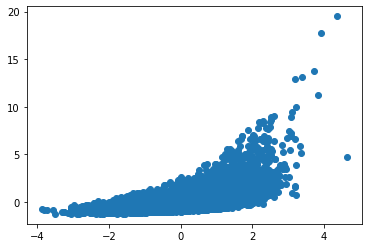

In [62]:
fig, ax = plt.subplots()

x = scaled_p_df['sqft_living']
y = scaled_p_df['price']


ax.scatter(x, y);

In [63]:
np.corrcoef(df['sqft_living'],df['price'])

array([[1.       , 0.7019173],
       [0.7019173, 1.       ]])

In [64]:
# Baseline model
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X = scaled_p_df['sqft_living']
y = scaled_p_df['price']

# Fit
dummy_lr.fit(X,y)

# Score
dummy_lr.score(X,y)

0.0

In [65]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_p_df[['sqft_living']]
y_s_p = scaled_p_df[['price']]

In [66]:
sk_lr = LinearRegression()
sk_lr.fit(X_s_p, y_s_p)
preds = sk_lr.predict(y_s_p)

preds

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- sqft_living

  warnings.warn(message, FutureWarning)


array([[-0.34145182],
       [ 0.31036913],
       [-0.42747895],
       ...,
       [ 0.13004303],
       [-0.45725758],
       [-0.66570793]])

In [67]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]

In [68]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]


In [69]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]
resids = y - preds
resids

,price
14622,-0.22
1744,0.20
2729,-0.28
13117,0.01
18281,-0.12
...,...
13105,-0.26
17476,-0.29
9990,0.08
338,-0.30


In [70]:
#Create out bins

bins = int( len(X)**.5)
bins

119

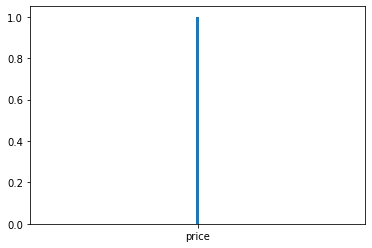

In [71]:
# Histogram of residuals

plt.hist(resids, bins=bins);

In [72]:
print(resids.max())
resids.min()

price   7.67
dtype: float64


price   -0.49
dtype: float64

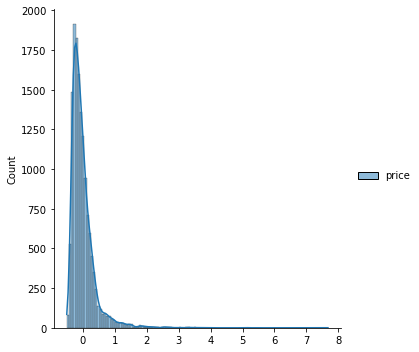

In [73]:
sns.displot(resids, bins=bins, kde=True)

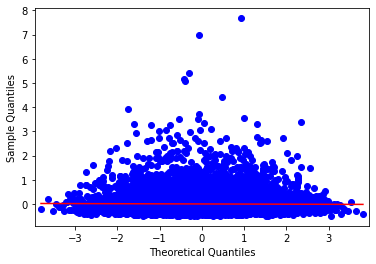

In [74]:
sm.qqplot(resids, line='r');

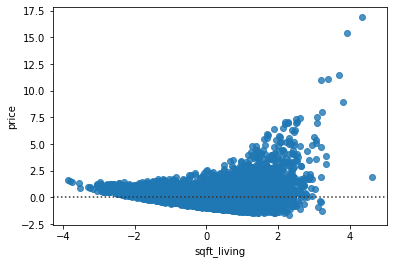

In [75]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

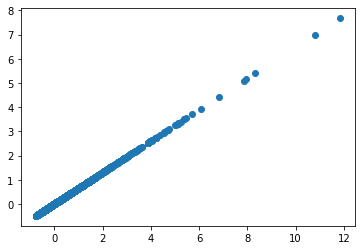

In [76]:
plt.scatter(preds, resids);

In [77]:
#Fit the dummy_regressor

dummy_lr.fit(X_s_p,y_s_p)

DummyRegressor()

In [78]:
# Score it

dummy_lr.score(X_s_p,y_s_p)

0.0

# Modeling

In [79]:
# Creating a straightforward, initial model --
# just for kicks
simple_formula = 'price ~ sqft_living'
simple_models = ols(formula = simple_formula,
                   data = scaled_p_df).fit()
simple_mod_summ = simple_models.summary()

simple_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     8365.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:55   Log-Likelihood:                -17066.
No. Observations:               14350   AIC:                         3.414e+04
Df Residuals:                   14348   BIC:                         3.415e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.116e-14      0.007   -6.2e-12      1.000      -0.013       0.013
sqft_living     0.6069      0.007     91.458      0.000       0.594       0.620
==============================================================================
Omnibus:                    13227.742   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1260597.499
Skew:                           4.113   Prob(JB):                         0.00
Kurtosis:                      48.174   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

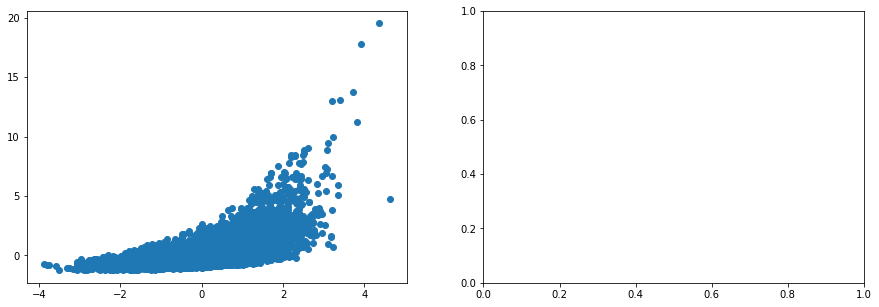

In [80]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

x1 = scaled_p_df[['sqft_living']]
y1 = scaled_p_df[['price']]

# x2 = scaled_and_parse_df[['bedrooms']]

ax[0].scatter(x1, y1)
# ax[1].scatter(x2,y1);

In [81]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     1732.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:56   Log-Likelihood:                -14295.
No. Observations:               14350   AIC:                         2.861e+04
Df Residuals:                   14338   BIC:                         2.871e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.023e-14      0.005   -3.7e-12      1.000      -0.011       0.011
sqft_living             0.2798      0.008     34.494      0.000       0.264       0.296
view_GOOD              -0.0020      0.006     -0.326      0.744      -0.014       0.010
view_NONE              -0.1686      0.006    -26.621      0.000      -0.181      -0.156
grade_11_Excellent      0.1145      0.006     18.138      0.000       0.102       0.127
grade_12_Luxury         0.1665      0.006     29.094      0.000       0.155       0.178
grade_13_Mansion        0.1601      0.006     29.067      0.000       0.149       0.171
grade_5_Fair           -0.1246      0.006    -19.392      0.000      -0.137      -0.112
grade_6_Low_Average    -0.3562      0.011    -33.896      0.000      -0.377      -0.336
grade_7_Average        -0.5896      0.014    -41.830      0.000      -0.617      -0.562
grade_8_Good           -0.4601      0.012    -37.667      0.000      -0.484      -0.436
grade_9_Better         -0.1993      0.009    -21.379      0.000      -0.218      -0.181
==============================================================================
Omnibus:                    10708.680   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           706350.719
Skew:                           2.999   Prob(JB):                         0.00
Kurtosis:                      36.844   Cond. No.                         5.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
simple_formula4 = 'price ~  view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     1650.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:57   Log-Likelihood:                -14867.
No. Observations:               14350   AIC:                         2.976e+04
Df Residuals:                   14339   BIC:                         2.984e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.614e-17      0.006  -1.69e-14      1.000      -0.011       0.011
view_GOOD              -0.0002      0.006     -0.028      0.978      -0.013       0.012
view_NONE              -0.1885      0.007    -28.728      0.000      -0.201      -0.176
grade_11_Excellent      0.1366      0.007     20.900      0.000       0.124       0.149
grade_12_Luxury         0.1865      0.006     31.466      0.000       0.175       0.198
grade_13_Mansion        0.1712      0.006     29.909      0.000       0.160       0.182
grade_5_Fair           -0.2082      0.006    -33.609      0.000      -0.220      -0.196
grade_6_Low_Average    -0.5594      0.009    -61.762      0.000      -0.577      -0.542
grade_7_Average        -0.8150      0.013    -62.703      0.000      -0.841      -0.790
grade_8_Good           -0.5891      0.012    -48.675      0.000      -0.613      -0.565
grade_9_Better         -0.2343      0.010    -24.301      0.000      -0.253      -0.215
==============================================================================
Omnibus:                    10662.505   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           687729.522
Skew:                           2.985   Prob(JB):                         0.00
Kurtosis:                      36.385   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
simple_formula4 = 'price ~ sqft_living + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     1905.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:57   Log-Likelihood:                -14719.
No. Observations:               14350   AIC:                         2.946e+04
Df Residuals:                   14340   BIC:                         2.953e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.047e-14      0.006  -3.63e-12      1.000      -0.011       0.011
sqft_living             0.3052      0.008     36.741      0.000       0.289       0.321
grade_11_Excellent      0.1214      0.006     18.690      0.000       0.109       0.134
grade_12_Luxury         0.1759      0.006     29.886      0.000       0.164       0.187
grade_13_Mansion        0.1648      0.006     29.070      0.000       0.154       0.176
grade_5_Fair           -0.1283      0.007    -19.384      0.000      -0.141      -0.115
grade_6_Low_Average    -0.3693      0.011    -34.168      0.000      -0.391      -0.348
grade_7_Average        -0.6215      0.014    -42.960      0.000      -0.650      -0.593
grade_8_Good           -0.4817      0.013    -38.373      0.000      -0.506      -0.457
grade_9_Better         -0.2083      0.010    -21.710      0.000      -0.227      -0.189
==============================================================================
Omnibus:                    11005.938   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           710586.151
Skew:                           3.143   Prob(JB):                         0.00
Kurtosis:                      36.896   Cond. No.                         5.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     3378.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:58   Log-Likelihood:                -16528.
No. Observations:               14350   AIC:                         3.306e+04
Df Residuals:                   14346   BIC:                         3.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.764e-14      0.006  -5.89e-12      1.000      -0.013       0.013
sqft_living     0.5553      0.007     84.427      0.000       0.542       0.568
view_GOOD       0.0114      0.007      1.583      0.113      -0.003       0.026
view_NONE      -0.2143      0.007    -29.149      0.000      -0.229      -0.200
==============================================================================
Omnibus:                    12992.814   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1297408.554
Skew:                           3.969   Prob(JB):                         0.00
Kurtosis:                      48.901   Cond. No.                         1.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
no_y_train_df = scaled_p_df.drop(columns = 'price')

In [86]:
#just bedroom, bathrooms, sqft_lot, no zipcode
no_zip_yr_built = no_y_train_df.drop(columns = ['zipcode', 'yr_built'])

In [87]:
all_var = sm.OLS(y_train, sm.add_constant(no_zip_yr_built)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1160.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:58   Log-Likelihood:            -1.9777e+05
No. Observations:               14350   AIC:                         3.956e+05
Df Residuals:                   14331   BIC:                         3.957e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.414e+05   1954.890    276.944      0.000    5.38e+05    5.45e+05
view_AVERAGE        -1.502e+04   3714.888     -4.044      0.000   -2.23e+04   -7740.703
view_EXCELLENT       4.776e+04   2647.270     18.043      0.000    4.26e+04     5.3e+04
view_GOOD            3412.8560   3041.371      1.122      0.262   -2548.625    9374.337
view_NONE           -5.592e+04   4699.539    -11.899      0.000   -6.51e+04   -4.67e+04
view_nan            -7560.9815   2124.462     -3.559      0.000   -1.17e+04   -3396.761
grade_10_Very_Good   1.014e+05   1.24e+04      8.172      0.000    7.71e+04    1.26e+05
grade_11_Excellent   1.019e+05   7646.628     13.324      0.000    8.69e+04    1.17e+05
grade_12_Luxury      8.699e+04   4206.939     20.678      0.000    7.87e+04    9.52e+04
grade_13_Mansion     6.775e+04   2324.846     29.140      0.000    6.32e+04    7.23e+04
grade_5_Fair         -758.3997   5756.406     -0.132      0.895    -1.2e+04    1.05e+04
grade_6_Low_Average  1737.0890   1.58e+04      0.110      0.913   -2.93e+04    3.28e+04
grade_7_Average      8274.6707   2.67e+04      0.310      0.757   -4.41e+04    6.06e+04
grade_8_Good         3.512e+04   2.45e+04      1.435      0.151   -1.29e+04    8.31e+04
grade_9_Better       7.504e+04    1.8e+04      4.179      0.000    3.98e+04     1.1e+05
bedrooms            -4364.8174   2575.588     -1.695      0.090   -9413.303     683.669
bathrooms            1.315e+04   3154.130      4.169      0.000    6968.571    1.93e+04
sqft_living          9.312e+04   3973.077     23.438      0.000    8.53e+04    1.01e+05
sqft_lot            -1.057e+04   1999.986     -5.287      0.000   -1.45e+04   -6654.199
==============================================================================
Omnibus:                    10532.744   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           784333.064
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                      38.758   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
no_zip_yr_built_bathrooms = no_y_train_df.drop(columns = ['zipcode', 'yr_built', 'bathrooms'])

In [89]:
all_var = sm.OLS(y_train, sm.add_constant(no_zip_yr_built_bathrooms)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1226.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:58   Log-Likelihood:            -1.9778e+05
No. Observations:               14350   AIC:                         3.956e+05
Df Residuals:                   14332   BIC:                         3.957e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.414e+05   1956.007    276.785      0.000    5.38e+05    5.45e+05
view_AVERAGE        -1.495e+04   3716.972     -4.023      0.000   -2.22e+04   -7666.074
view_EXCELLENT       4.778e+04   2648.781     18.038      0.000    4.26e+04     5.3e+04
view_GOOD            3550.8513   3042.929      1.167      0.243   -2413.683    9515.386
view_NONE            -5.56e+04   4701.605    -11.826      0.000   -6.48e+04   -4.64e+04
view_nan            -7549.6672   2125.674     -3.552      0.000   -1.17e+04   -3383.071
grade_10_Very_Good   1.028e+05   1.24e+04      8.280      0.000    7.85e+04    1.27e+05
grade_11_Excellent   1.033e+05   7643.327     13.516      0.000    8.83e+04    1.18e+05
grade_12_Luxury      8.808e+04   4201.159     20.966      0.000    7.98e+04    9.63e+04
grade_13_Mansion     6.844e+04   2320.157     29.500      0.000    6.39e+04     7.3e+04
grade_5_Fair        -1077.5871   5759.186     -0.187      0.852   -1.24e+04    1.02e+04
grade_6_Low_Average   380.9916   1.58e+04      0.024      0.981   -3.07e+04    3.14e+04
grade_7_Average      7637.2649   2.67e+04      0.286      0.775   -4.48e+04       6e+04
grade_8_Good         3.646e+04   2.45e+04      1.489      0.137   -1.15e+04    8.45e+04
grade_9_Better        7.62e+04    1.8e+04      4.242      0.000     4.1e+04    1.11e+05
bedrooms            -2929.8674   2553.950     -1.147      0.251   -7935.939    2076.205
sqft_living          9.991e+04   3626.690     27.547      0.000    9.28e+04    1.07e+05
sqft_lot            -1.089e+04   1999.738     -5.443      0.000   -1.48e+04   -6965.625
==============================================================================
Omnibus:                    10579.213   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           799105.171
Skew:                           2.894   Prob(JB):                         0.00
Kurtosis:                      39.097   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
no_zip_yr_built_bathrooms_bedrooms = no_y_train_df.drop(columns = ['zipcode', 'yr_built', 'bathrooms', 'bedrooms'])

In [91]:
all_var = sm.OLS(y_train, sm.add_constant(no_zip_yr_built_bathrooms_bedrooms)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1302.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:59   Log-Likelihood:            -1.9778e+05
No. Observations:               14350   AIC:                         3.956e+05
Df Residuals:                   14333   BIC:                         3.957e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.414e+05   1956.028    276.782      0.000    5.38e+05    5.45e+05
view_AVERAGE        -1.494e+04   3717.002     -4.020      0.000   -2.22e+04   -7655.688
view_EXCELLENT       4.784e+04   2648.168     18.067      0.000    4.27e+04     5.3e+04
view_GOOD            3572.0234   3042.906      1.174      0.240   -2392.467    9536.514
view_NONE           -5.572e+04   4700.459    -11.855      0.000   -6.49e+04   -4.65e+04
view_nan            -7557.0613   2125.688     -3.555      0.000   -1.17e+04   -3390.438
grade_10_Very_Good   1.032e+05   1.24e+04      8.315      0.000    7.89e+04    1.28e+05
grade_11_Excellent   1.036e+05   7639.674     13.558      0.000    8.86e+04    1.19e+05
grade_12_Luxury      8.826e+04   4198.339     21.023      0.000       8e+04    9.65e+04
grade_13_Mansion     6.851e+04   2319.351     29.540      0.000     6.4e+04    7.31e+04
grade_5_Fair        -1161.1762   5758.788     -0.202      0.840   -1.24e+04    1.01e+04
grade_6_Low_Average   225.0969   1.58e+04      0.014      0.989   -3.08e+04    3.13e+04
grade_7_Average      7482.4362   2.67e+04      0.280      0.780   -4.49e+04    5.99e+04
grade_8_Good         3.666e+04   2.45e+04      1.497      0.135   -1.14e+04    8.47e+04
grade_9_Better       7.656e+04    1.8e+04      4.263      0.000    4.14e+04    1.12e+05
sqft_living          9.753e+04   2978.221     32.748      0.000    9.17e+04    1.03e+05
sqft_lot            -1.071e+04   1993.607     -5.370      0.000   -1.46e+04   -6797.818
==============================================================================
Omnibus:                    10578.993   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           799568.911
Skew:                           2.894   Prob(JB):                         0.00
Kurtosis:                      39.108   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
no_zip_built_bathrooms_bedrooms_lot = no_y_train_df.drop(columns = ['zipcode', 'yr_built', 'bathrooms', 'bedrooms', 'sqft_lot'])

In [93]:
all_var = sm.OLS(y_train, sm.add_constant(no_zip_built_bathrooms_bedrooms_lot)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     1384.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:02:59   Log-Likelihood:            -1.9780e+05
No. Observations:               14350   AIC:                         3.956e+05
Df Residuals:                   14334   BIC:                         3.957e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.414e+05   1957.927    276.514      0.000    5.38e+05    5.45e+05
view_AVERAGE        -1.557e+04   3718.752     -4.187      0.000   -2.29e+04   -8282.953
view_EXCELLENT       4.773e+04   2650.650     18.007      0.000    4.25e+04    5.29e+04
view_GOOD            2808.0839   3042.529      0.923      0.356   -3155.667    8771.834
view_NONE           -5.623e+04   4704.089    -11.952      0.000   -6.54e+04    -4.7e+04
view_nan            -7676.7211   2127.634     -3.608      0.000   -1.18e+04   -3506.283
grade_10_Very_Good   1.041e+05   1.24e+04      8.382      0.000    7.98e+04    1.28e+05
grade_11_Excellent   1.038e+05   7646.966     13.576      0.000    8.88e+04    1.19e+05
grade_12_Luxury      8.808e+04   4202.272     20.959      0.000    7.98e+04    9.63e+04
grade_13_Mansion     6.868e+04   2321.390     29.587      0.000    6.41e+04    7.32e+04
grade_5_Fair        -1238.1829   5764.359     -0.215      0.830   -1.25e+04    1.01e+04
grade_6_Low_Average  1167.4473   1.59e+04      0.074      0.941   -2.99e+04    3.22e+04
grade_7_Average      9838.3546   2.68e+04      0.368      0.713   -4.26e+04    6.23e+04
grade_8_Good         3.909e+04   2.45e+04      1.595      0.111   -8956.689    8.71e+04
grade_9_Better       7.816e+04    1.8e+04      4.348      0.000    4.29e+04    1.13e+05
sqft_living          9.584e+04   2964.400     32.330      0.000       9e+04    1.02e+05
==============================================================================
Omnibus:                    10617.893   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           803991.823
Skew:                           2.911   Prob(JB):                         0.00
Kurtosis:                      39.204   Cond. No.                         36.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No log transformation
- sqft_living = .488
- sqft_living+ view + grade = .593
- view + grade = .535
- sqft_living + grade = .570
- living + view = .517
- view + grade + bedroom + bathroom + living + lot = .614
- view + grade + living + bedrooms + lot = .614
- view + grade + living + lot = .613
- view + grade + living = .612


Post log transformation
- sqft_living = .368
- sqft_living+ view + grade = .571
- view + grade = .535
- sqft_living + grade = .544
- living + view = .414
- view + grade + bedroom + bathroom + living + lot = .592 (bedroom & bathroom are multicollinear)
- view + grade + living + bedrooms + lot = .592 (we get the same adj r-sqr because bedroom & bathroom are multicollinear)
- view + grade + living + lot = .592
- view + grade + living = .591

## Testing Data

In [94]:
# Can now predict for our test set!
simple_test_preds = simple_model.predict(sm.add_constant(X_test['sqft_living']))
simple_test_preds

690     520712.26
14944   703209.23
8329    307676.76
7907    738511.25
17942   806055.43
           ...   
15022   409181.40
20717   643096.87
21091   629269.49
13222   882019.88
8044    858401.96
Length: 7069, dtype: float64

In [95]:
r2_score(y_test,simple_test_preds)

0.3836271889068843

In [96]:
r2_score(y_train,simple_train_preds)

0.3682781853572882

Our simple model appears to under perform our test model by .02.

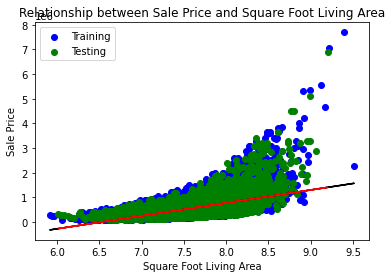

In [97]:
# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(train_df['sqft_living'], train_df['price'], color='blue', label='Training')
# Plot our testing data
plt.scatter(test_df['sqft_living'], test_df['price'], color='green', label='Testing')


# Plot the line of best fit
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(test_df['sqft_living'], simple_test_preds, color='red')

plt.ylabel('Sale Price')
plt.xlabel('Square Foot Living Area')
plt.title('Relationship between Sale Price and Square Foot Living Area')
plt.legend()
plt.show()

In [98]:
cat_cols2 = [c for c in test_df.columns if test_df[c].dtype == 'O']

encoder = OneHotEncoder(drop='if_binary')
from sklearn.compose import ColumnTransformer

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct2 = ColumnTransformer(transformers=[('ohe', encoder, cat_cols2)],
                       remainder='passthrough')
ct2.fit(test_df)
X_test_enc = ct2.transform(test_df)
X_test_enc

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.9580e+03, 9.8055e+04,
        3.7300e+05],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.9850e+03, 9.8052e+04,
        7.9010e+05],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.9640e+03, 9.8008e+04,
        5.0000e+05],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0140e+03, 9.8003e+04,
        3.3349e+05],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.9240e+03, 9.8039e+04,
        1.6500e+06],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0120e+03, 9.8059e+04,
        5.9000e+05]])

In [99]:
X_test_enc= pd.DataFrame(X_test_enc, columns= ct.get_feature_names())

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [100]:
# Transform training data
X_test_scaled = scaler.transform(X_test_enc)
X_test_scaled

array([[-0.21552789, -0.11645273,  7.83526032, ..., -0.44854449,
        -0.43090044, -0.45906168],
       [-0.21552789, -0.11645273, -0.12762818, ...,  0.47187265,
        -0.48719678,  0.67800069],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.24400735,
        -1.31287646, -0.11284514],
       ...,
       [-0.21552789, -0.11645273, -0.12762818, ...,  1.46046883,
        -1.4067037 , -0.56677047],
       [-0.21552789, -0.11645273, -0.12762818, ..., -1.60758829,
        -0.7311476 ,  3.02218658],
       [-0.21552789, -0.11645273, -0.12762818, ...,  1.39228978,
        -0.35583865,  0.13250517]])

In [101]:
scaled_test_df = pd.DataFrame(X_test_scaled, columns= ct.get_feature_names_out(), index = y_test.index)

In [102]:
scaled_test_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_test_df.columns]

In [103]:
scaled_test_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

In [111]:
X_train_scaled

array([[-0.21552789, -0.11645273, -0.12762818, ...,  0.4036936 ,
        -0.3746041 , -0.56265404],
       [-0.21552789, -0.11645273, -0.12762818, ...,  1.08548407,
        -0.91880207,  0.51143509],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.82352925,
         1.68959511, -0.70441199],
       ...,
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.38036544,
        -0.82497483,  0.21428861],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.58490258,
         1.03280445, -0.75348205],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.99397686,
        -0.41213499, -1.09697249]])

In [104]:
# Set up and fit your model
model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

In [105]:
model.score(X_train_scaled, y_train)

1.0

In [106]:
model.score(X_test_scaled, y_test)

1.0

In [107]:
train_preds = model.predict(X_train_scaled)

test_preds = model.predict(X_test_scaled)

In [108]:
r2_score(y_train, train_preds)

1.0

In [109]:
r2_score(y_test, test_preds)

1.0